# Data Description
## Stroke
- `id` : 고유 식별자
- `gender` : 환자의 성별
- `age` : 환자의 연령
- `hypertension` : 환자가 고혈압이 아닌 경우 0, 고혈압인 경우 1
- `heart_parament` : 환자가 심장 질환이 없는 경우 0, 환자가 심장 질환이 있는 경우 1
- `ever_married` : 결혼한 적이 있는가 "아니오" 또는 "예"
- `work_type` : "Children", "Govt_jov", "Never_worked", "Private" 또는 "Self-employed"
- `Residence_type` : "Rural" or "Urban”
- `avg_glucose_level` : 혈중 평균 포도당 수준
- `bmi` : 체질량지수
- `smoking_status` : "formerly smoked", "never smoked", "smokes" or "Unknown"
- `stroke` : 뇌졸중이 있는 경우 1, 뇌졸중이 아닌 경우 0
- 참고 : smoking_status의 **Unknown**은 이 환자에 대한 정보를 사용할 수 없음을 의미한다.

# 라이브러리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import kstest

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.svm import SVC

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance, plot_tree
from lightgbm import LGBMClassifier
from lightgbm import plot_importance, plot_metric, plot_tree

from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import power_transform
from sklearn.metrics import accuracy_score, precision_score , recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle

In [3]:
ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A494-C8A8

 C:\myPyCode\Code lion 디렉터리

2022-06-19  오후 08:08    <DIR>          .
2022-06-19  오후 08:08    <DIR>          ..
2022-06-15  오후 01:16               316 .gitignore
2022-06-19  오후 08:08    <DIR>          .ipynb_checkpoints
2022-05-09  오후 05:18            23,099 1주차 과제 - 파이썬 기초-박준혁.ipynb
2022-05-17  오전 11:18            31,821 2주차 과제 - 타이타닉 판다스 박준혁.ipynb
2022-05-23  오후 02:09           152,247 3주차 과제 - 타이타닉 EDA 연습 박준혁.ipynb
2022-05-30  오후 10:25        43,093,490 4주차 과제 - diamonds-EDA연습-박준혁.ipynb
2022-06-07  오후 08:19           461,464 5주차 과제 - PenguinsEDA 박준혁.ipynb
2022-06-16  오후 05:23         1,558,081 5팀 심전근_뇌졸증 진단 프로그램_0615.ipynb
2022-06-16  오후 06:47         1,956,893 5팀 심전근_뇌졸증 진단 프로그램_0616.ipynb
2022-06-17  오후 06:54         1,191,438 5팀 심전근_뇌졸증 진단 프로그램_0617.ipynb
2022-06-17  오후 04:38         1,630,341 5팀 심전근_뇌졸증 진단 프로그램_0617_f1기반.ipynb
2022-06-17  오후 04:30         1,634,495 5팀 심전근_뇌졸증 진단 프로그램_0617_재현율기반.ipynb
2022-06-15  오후 03:42           45

# Data Load

In [4]:
stroke = pd.read_csv("data/Healthcare-Stroke.csv")

# 데이터 살펴보기

In [5]:
stroke.shape

(5110, 12)

In [6]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
stroke.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


- 연속형 변수

In [9]:
sample1 = stroke[["age", "bmi", "avg_glucose_level"]]

def num_desc(data):
    df = data.describe().T
    
    df1 = data.isnull().sum()
    df1.name = "missing"
    
    df2 = data.skew()
    df2.name = "skewness"
    
    df3 = data.kurt()
    df3.name = "kurtosis"

    df4 = data.median()
    df4.name = "median"
    
    df = pd.concat([df, df1, df2, df3, df4], axis=1)
    df["total"] = df["count"] + df["missing"]
    
    order = ["total", "count", "missing", "mean", "median", "std", "skewness", "kurtosis", "min", "max", "25%", "75%"]
        
    num_df = df[order]
    num_df = num_df.round(2)
    
    return num_df

In [10]:
num_desc(sample1)

,total,count,missing,mean,median,std,skewness,kurtosis,min,max,25%,75%
age,5110.0,5110.0,0,43.23,45.00,22.61,-0.14,-0.99,0.08,82.00,25.00,61.00
bmi,5110.0,4909.0,201,28.89,28.10,7.85,1.06,3.36,10.30,97.60,23.50,33.10
avg_glucose_level,5110.0,5110.0,0,106.15,91.88,45.28,1.57,1.68,55.12,271.74,77.24,114.09


- 범주형 변수

In [11]:
def cat_df(data, col):
    cat_df = data[col].value_counts(dropna=False).to_frame().sort_index(ascending=True).rename(columns={col:"count"}).reset_index()
    cat_df = cat_df.rename(columns={"index":col})

    return cat_df

In [12]:
cat_df(stroke, "gender")

,gender,count
0,Female,2994
1,Male,2115
2,Other,1


In [13]:
cat_df(stroke, "ever_married")

,ever_married,count
0,No,1757
1,Yes,3353


In [14]:
cat_df(stroke, "work_type")

,work_type,count
0,Govt_job,657
1,Never_worked,22
2,Private,2925
3,Self-employed,819
4,children,687


In [15]:
cat_df(stroke, "Residence_type")

,Residence_type,count
0,Rural,2514
1,Urban,2596


In [16]:
cat_df(stroke, "hypertension")

,hypertension,count
0,0,4612
1,1,498


In [17]:
cat_df(stroke, "heart_disease")

,heart_disease,count
0,0,4834
1,1,276


## 결측치
- bmi에 201개의 결측치 존재

In [18]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

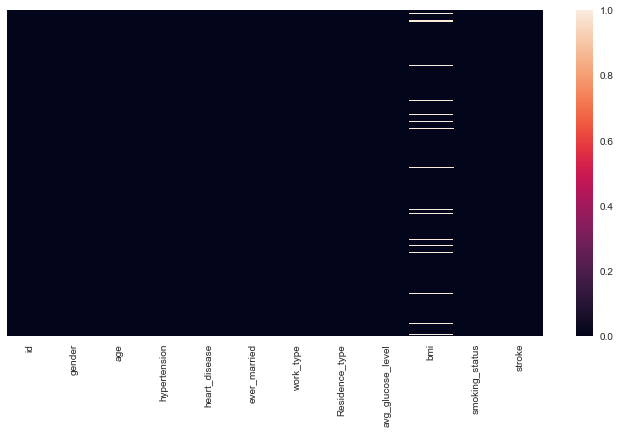

In [19]:
plt.figure(figsize=(12, 6))
sns.heatmap(stroke.isnull(), yticklabels = False)
plt.show()

- bmi는 평균, 중위수, 최빈값이 비슷하므로 평균 대체

In [20]:
bmi_group = stroke.groupby(["stroke"])[["bmi"]].mean()
bmi_group

,bmi
stroke,
0,28.823064
1,30.471292


In [21]:
stroke.loc[(stroke["stroke"] == 0) & (stroke["bmi"].isnull()), "bmi"] = bmi_group.loc[0, "bmi"]
stroke.loc[(stroke["stroke"] == 1) & (stroke["bmi"].isnull()), "bmi"] = bmi_group.loc[1, "bmi"]

In [22]:
stroke.isnull().sum()["bmi"]

0

## 중복값
- 중복값이 존재하지 않는다.

In [23]:
stroke[stroke.duplicated()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


## 이상치

In [24]:
num_cols = ["age", "avg_glucose_level", "bmi"]
cat_cols = stroke.drop(num_cols, axis=1)

In [25]:
def outlier_df(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    outlier = data[(Q1 - 1.5 * IQR > data[col]) | (data[col] > Q3 + 1.5 * IQR)]
    
    print(f"하한값 : {Q1 - 1.5 * IQR},  상한값 : {Q3 + 1.5 * IQR}")
    return outlier

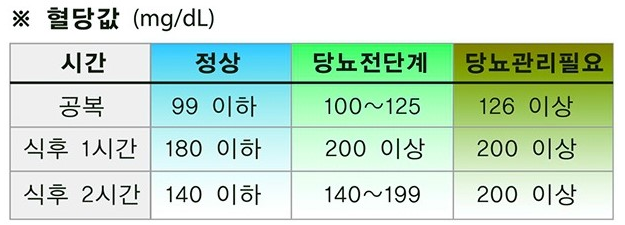

In [26]:
outlier_df(stroke, "avg_glucose_level")

하한값 : 21.977500000000006,  상한값 : 169.35750000000002


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.471292,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5061,38009,Male,41.0,0,0,Yes,Private,Urban,223.78,32.300000,never smoked,0
5062,11184,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.900000,never smoked,0
5063,68967,Male,39.0,0,0,Yes,Private,Urban,179.38,27.700000,Unknown,0
5064,66684,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.300000,Unknown,0


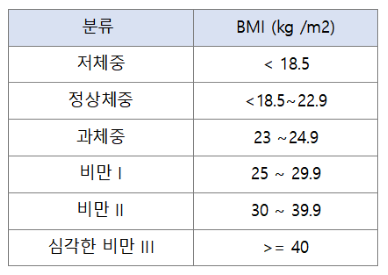

- 네이버 bmi 계산기로 계산해본 결과 ... bmi가 46 이상인 경우는 저게 사람의 몸무게인가 싶을 정도였다.. 조정이 필요해보인다.

In [27]:
outlier_df(stroke, "bmi")

하한값 : 10.300000000000006,  상한값 : 46.29999999999999


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,13861,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
66,17004,Female,70.0,0,0,Yes,Private,Urban,221.58,47.5,never smoked,1
113,41069,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
254,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
258,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4906,72696,Female,53.0,0,0,Yes,Private,Urban,70.51,54.1,never smoked,0
4952,16245,Male,51.0,1,0,Yes,Self-employed,Rural,211.83,56.6,never smoked,0
5009,40732,Female,50.0,0,0,Yes,Self-employed,Rural,126.85,49.5,formerly smoked,0
5057,38349,Female,49.0,0,0,Yes,Govt_job,Urban,69.92,47.6,never smoked,0


<AxesSubplot:>

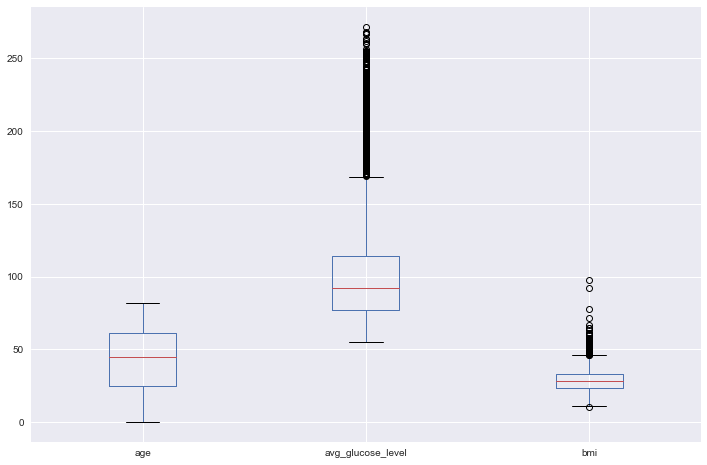

In [28]:
stroke[num_cols].boxplot(figsize=(12, 8))

- bmi 이상치를 각 상한값과 하한값으로 대체

In [29]:
stroke.loc[stroke["bmi"] > 46.29999999999999, "bmi"] = 46.29999999999999
stroke.loc[stroke["bmi"] < 10.300000000000006, "bmi"] = 10.300000000000006

In [30]:
outlier_df(stroke, "bmi")

하한값 : 10.300000000000006,  상한값 : 46.29999999999999


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


- 혈당 포도당 수치가 공복, 식전, 식후 중 어느 것을 기준으로 봐야할지 잘 모르겠다..
- 200이 넘는 값을 상한값으로 대체한다.

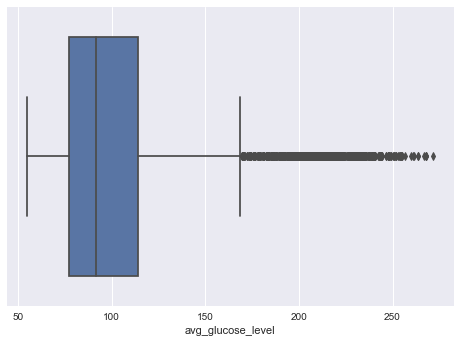

In [31]:
sns.boxplot(data=stroke, x="avg_glucose_level")
plt.show()

In [32]:
stroke.loc[stroke["avg_glucose_level"] > 200, "avg_glucose_level"] = 169
stroke.loc[stroke["avg_glucose_level"] < 21, "avg_glucose_level"] = 21

- 전체 변수의 히스토그램

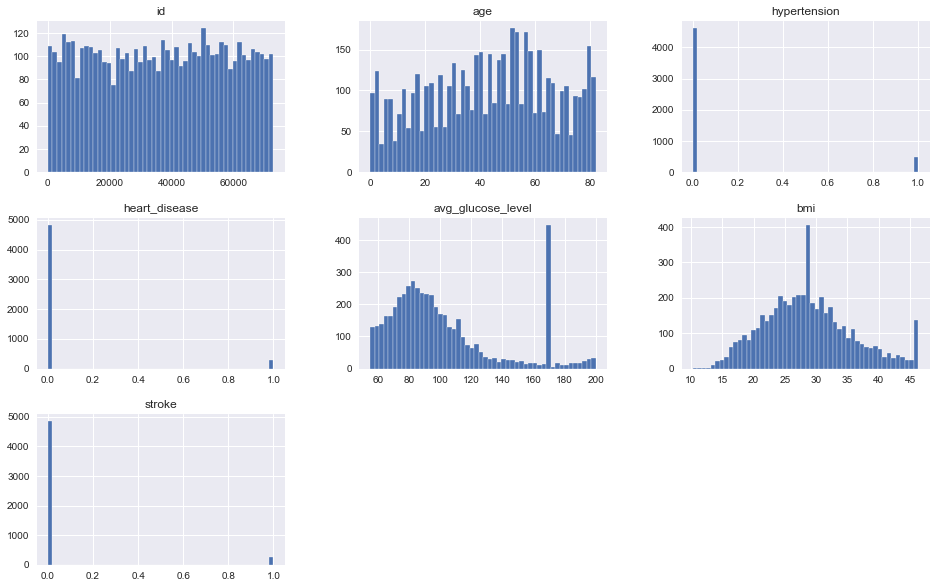

In [33]:
_ = stroke.hist(figsize=(16, 10), bins=50)

- 수치형 변수 간의 상관계수

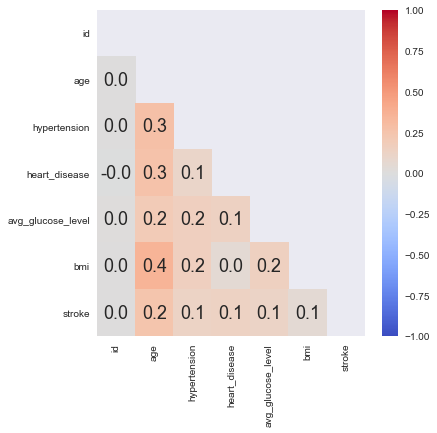

In [34]:
mask = np.triu(np.ones_like(stroke.corr()))

plt.figure(figsize=(6, 6))
sns.heatmap(stroke.corr(), cmap="coolwarm", vmin=-1, vmax=1, mask=mask, annot=True, fmt="1.1f")
plt.show()

범주별 히스토그램

In [35]:
def hist_plot(data, col1, col2):
    plt.figure(figsize=(12, 5))
    sns.histplot(data=data, x=col1, hue=col2, kde=True)
    plt.show()

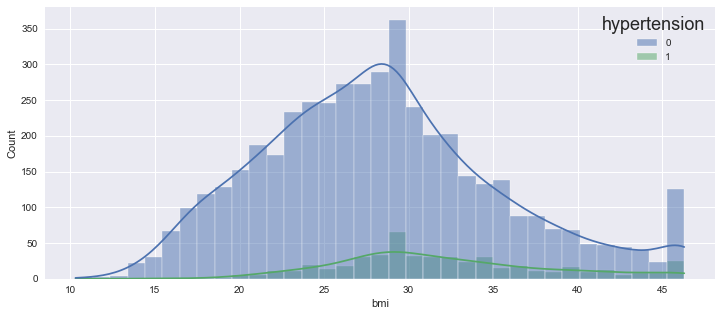

In [36]:
hist_plot(stroke, "bmi", "hypertension")

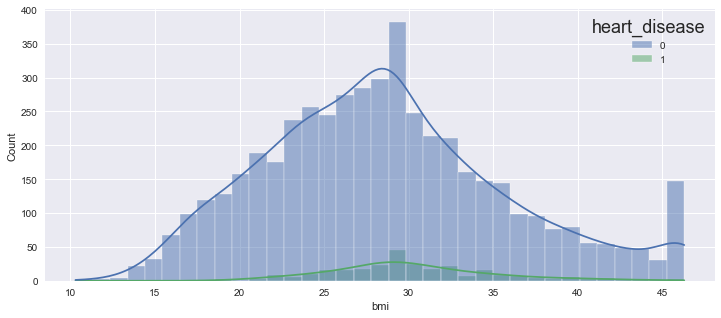

In [37]:
hist_plot(stroke, "bmi", "heart_disease")

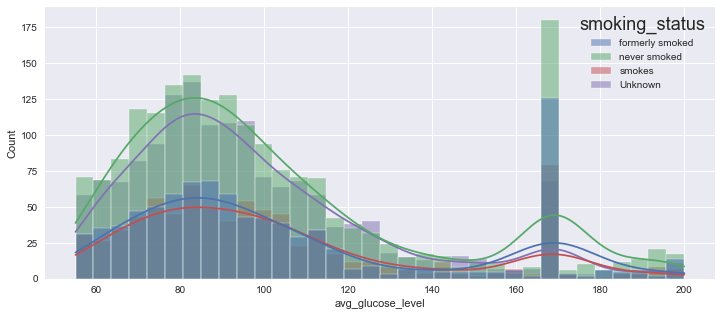

In [38]:
hist_plot(stroke, "avg_glucose_level", "smoking_status")

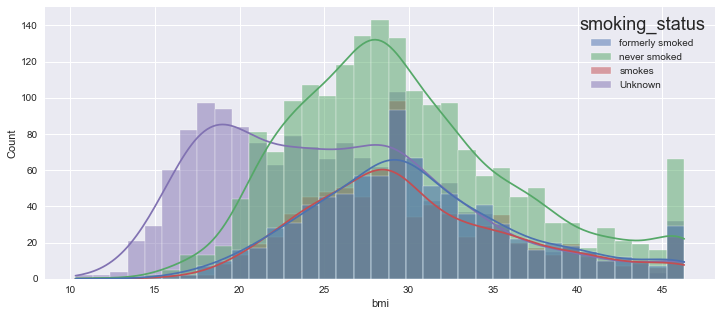

In [39]:
hist_plot(stroke, "bmi", "smoking_status")

- target 변수 분포 확인
- 데이터가 불균형하다.

In [40]:
stroke["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

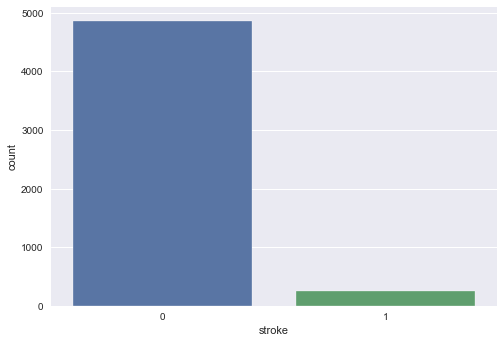

In [41]:
sns.countplot(data=stroke, x="stroke")
plt.show()

# 전처리

- 불필요한 id 컬럼 삭제

In [42]:
stroke = stroke.drop(["id"], axis=1)

- 성별에 Other은 뭐지? 하나 뿐이므로 제거

In [43]:
stroke[stroke["gender"] == "Other"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [44]:
stroke = stroke.drop(3116, axis=0)

## 스케일링

In [45]:
target = stroke["stroke"]
num_cols = ["age", "avg_glucose_level", "bmi"]
cat_cols = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"]

- avg_glucose_level log 변환

<AxesSubplot:ylabel='Frequency'>

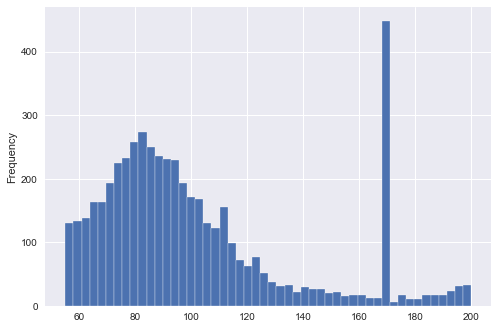

In [46]:
stroke["avg_glucose_level"].plot(kind="hist", bins=50)

<AxesSubplot:ylabel='Frequency'>

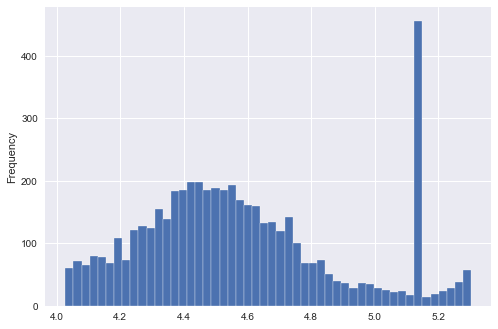

In [47]:
np.log1p(stroke["avg_glucose_level"]).plot(kind="hist", bins=50)

In [48]:
stroke["avg_glucose_level"] = np.log1p(stroke["avg_glucose_level"])

- 연속형 변수 StandardScaler

In [49]:
scale = StandardScaler()
stroke[num_cols] = scale.fit_transform(stroke[num_cols])

- 범주형 변수 One-hot Endoding

In [50]:
stroke = stroke.drop("stroke", axis=1)
stroke = pd.get_dummies(stroke)

stroke = pd.concat([stroke, target], axis=1)

In [51]:
stroke.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1.051242,0,1,1.780216,1.104760,0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,1
1,0.785889,0,0,1.780216,0.244108,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,1
2,1.626174,0,1,0.294148,0.528999,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
3,0.255182,0,0,1.821981,0.795815,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,1
4,1.581949,1,0,1.875309,-0.664652,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,1


- 불균형한 데이터 오버 샘플링

In [52]:
X = stroke.iloc[:, :-1]
y = stroke.iloc[:, -1]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=25)

In [54]:
import imblearn.over_sampling as osam 
ros = osam.RandomOverSampler(random_state=25)
X_train, y_train = ros.fit_resample(X_train, y_train)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6804, 20), (6804,), (1533, 20), (1533,))

In [55]:
y_train.value_counts()

0    3402
1    3402
Name: stroke, dtype: int64

In [56]:
y_test.value_counts()

0    1458
1      75
Name: stroke, dtype: int64

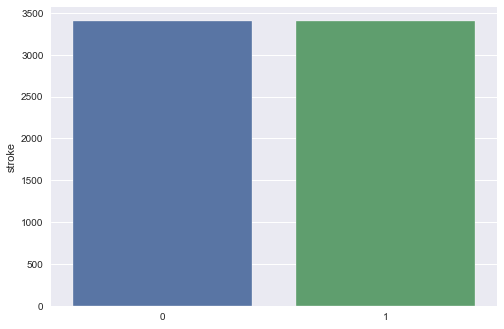

In [57]:
target = y_train.value_counts()

sns.barplot(x=target.index, y=target)
plt.show()

- 오버 샘플링으로 과적합이 발생하는 것 같다.
- 오버 샘플링 후 target == 1인 데이터를 절반 삭제한다.

In [58]:
df = pd.concat([X_train, y_train], axis=1)
print(df.shape)

(6804, 21)


In [59]:
target_0 = df[df['stroke'] == 0] 
target_1 = df[df['stroke'] == 1] 

target_0 = pd.DataFrame(target_0).reset_index(drop=True)
target_1 = pd.DataFrame(target_1).reset_index(drop=True)

target_0.shape, target_1.shape

((3402, 21), (3402, 21))

In [60]:
round(len(df[df['stroke'] == 1]) / 2)

1701

In [61]:
target_1 = target_1.sample(1701, random_state=725)

In [62]:
df = pd.concat([target_0, target_1], axis=0).reset_index(drop=True)
df['stroke'].value_counts()

0    3402
1    1701
Name: stroke, dtype: int64

# 모델링

In [63]:
X_train = df.drop(["stroke"], axis=1)
y_train = df["stroke"]

In [64]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5103, 20), (5103,), (1533, 20), (1533,))

In [65]:
model1 = LGBMClassifier(max_depth=3, n_estimators=123,random_state=25)
model2 = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=3, random_state=25)
model3 = GradientBoostingClassifier(max_depth=3, n_estimators=131, random_state=25)

vote_model = VotingClassifier(estimators=[("LGBM", model1), ("tree", model2), ("Gradient", model3)], voting="hard")

vote_model.fit(X_train, y_train)
predict = vote_model.predict(X_test)

print(vote_model.score(X_train, y_train))
print(vote_model.score(X_test, y_test))

0.8973153047227121
0.8851924331376386


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1458
           1       0.21      0.51      0.30        75

    accuracy                           0.89      1533
   macro avg       0.59      0.71      0.62      1533
weighted avg       0.94      0.89      0.91      1533



In [67]:
confmat = confusion_matrix(y_true=y_test, y_pred=predict)

print(confmat)

[[1319  139]
 [  37   38]]


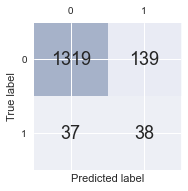

In [68]:
fig, ax = plt.subplots(figsize=(3, 3))

ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va="center", ha="center")

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

In [69]:
print(confusion_matrix(y_test , predict))

print(f"정확도 : {round(accuracy_score(y_test, predict), 2)}")
print(f"오분류율 : {round(1 - accuracy_score(y_test, predict), 2)}")
print(f"AUC : {round(roc_auc_score(y_test, predict), 2)}")
print(f"정밀도 : {round(precision_score(y_test, predict), 2)}")
print(f"재현율 : {round(recall_score(y_test, predict), 2)}")
print(f"F1 Score : {round(f1_score(y_test, predict), 2)}")

[[1319  139]
 [  37   38]]
정확도 : 0.89
오분류율 : 0.11
AUC : 0.71
정밀도 : 0.21
재현율 : 0.51
F1 Score : 0.3


# 성능

- LGBMClassifier(max_depth=3, n_estimators=123,random_state=25)
- DecisionTreeClassifier(max_depth=3, max_leaf_nodes=3, random_state=25)
- GradientBoostingClassifier(max_depth=3, n_estimators=131, random_state=25)

In [70]:
# [[1316  142]
#  [  37   38]]

# 정확도 : 0.88
# 오분류율 : 0.12
# AUC : 0.70
# 정밀도 : 0.21
# 재현율 : 0.51
# F1 Score : 0.30

- LGBMClassifier(max_depth=6, n_estimators=173,random_state=25)
- DecisionTreeClassifier(max_depth=6, random_state=25)
- GradientBoostingClassifier(max_depth=3, n_estimators=131, random_state=25)

In [71]:
# [[1359   99]
#  [  42   33]]

# 정확도 : 0.91
# AUC : 0.69
# 정밀도 : 0.25
# 재현율 : 0.44
# F1 Score : 0.32

- LGBMClassifier(learning_rate=0.5, max_depth=3, random_state=25)
- XGBClassifier(learning_rate=0.5, max_depth=3, random_state=25)
- GradientBoostingClassifier(max_depth=4, learning_rate=0.4, n_estimators=300, random_state=25)
- RandomOverSampling 진행 후 절반 삭제

In [72]:
# [[1403   55]
#  [  48   27]]

# 정확도 : 0.93
# 정밀도 : 0.33
# 재현율 : 0.36
# F1 Score : 0.34

## 6. Precision & Recall TradeOff

In [112]:
# 정확도 재현율 곡선
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

def precision_recall_curve_plot(y_test,pred_proba,title):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    plt.title(title,size=20)
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall')
    plt.legend()
    plt.grid(True)
    plt.show()
    
# ROC 곡선 
def roc_curve_plot(y_test, pred_proba, title):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba)
    
    plt.figure(figsize=(8,6))
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1],linestyle='--', label='Random', color='k')
    plt.title(title,size=20)
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1 - Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()

In [110]:
pred_train = vote_model.predict(X_train)

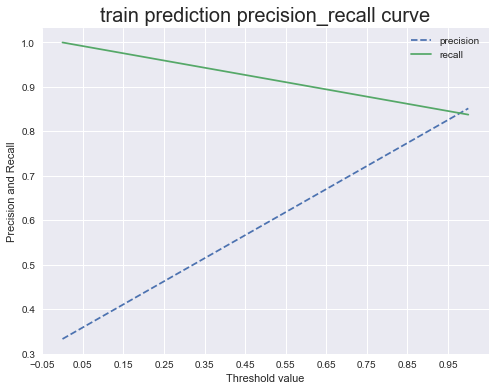

In [106]:
precision_recall_curve_plot(y_train, pred_train, 'train prediction precision_recall curve')

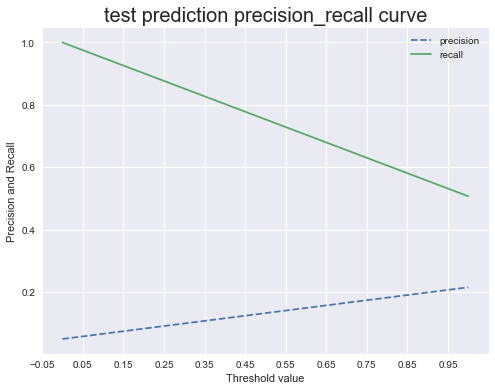

In [107]:
precision_recall_curve_plot(y_test,predict,'test prediction precision_recall curve')

train roc_auc_score : 0.8824


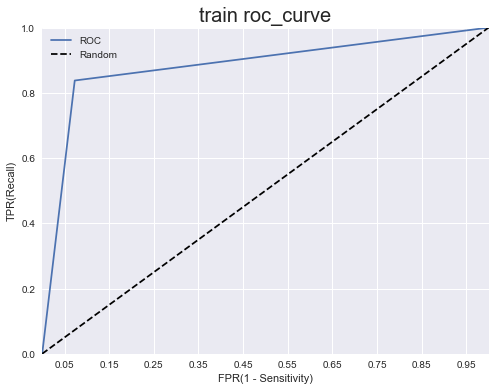

In [123]:
print('train roc_auc_score :',np.round(roc_auc_score(y_train,pred_train),4))
roc_curve_plot(y_train,pred_train,'train roc_curve')

test roc_auc_score : 0.7057


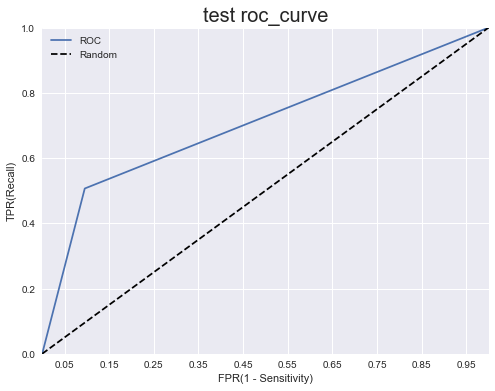

In [119]:
print('test roc_auc_score :',np.round(roc_auc_score(y_test,predict),4))
roc_curve_plot(y_test,predict,'test roc_curve')